In [4]:
import pandas as pd
import numpy as np
import json
import os
import utils

from pathlib import Path
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(rc={'figure.figsize':(18, 5)}, font_scale=2.5)
sns.set_style(style='whitegrid')

# Functions

In [5]:
def get_relevant_wikipages(wikipage_id, relevance_scores_dir):
    with open(relevance_scores_dir + str(wikipage_id) + '.json') as fp:
        relevant_wikipages = json.load(fp)
    return list(relevant_wikipages.keys())

def get_relevant_wikitables(relevant_wikipages, df):
    relevant_wikitables = set()
    num_relevant_wikitables = 0
    for wikipage in relevant_wikipages:
        wikipage_link = 'https://en.wikipedia.org/wiki/' + wikipage
        if wikipage_link in df['wikipage'].values:
            tables = df[df['wikipage']==wikipage_link]['tables'].values[0]
            num_relevant_wikitables += len(tables)
            # relevant_wikitables.update(tables)
    
    return num_relevant_wikitables

# Old Wikipages Dataset (2013)

## Table Corpus Distribution

In [6]:
df = pd.read_pickle('../../tables/wikipages/wikipages_expanded_dataset/wikipages_df.pickle')
df

,wikipage,wikipage_id,num_tables,tables,num_entities
0,https://en.wikipedia.org/wiki/Mid_Antrim_(Nort...,0,1,[table-0001-1.json],[13]
1,https://en.wikipedia.org/wiki/Paganini_Competi...,1,3,"[table-0001-101.json, table-0001-102.json, tab...","[32, 14, 32]"
2,https://en.wikipedia.org/wiki/List_of_musical_...,2,1,[table-0001-104.json],[182]
3,https://en.wikipedia.org/wiki/Richmond_Footbal...,3,2,"[table-0001-106.json, table-0001-109.json]","[16, 14]"
4,https://en.wikipedia.org/wiki/Red_Bull_BC_One,4,3,"[table-0001-112.json, table-0001-113.json, tab...","[16, 13, 17]"
...,...,...,...,...,...
244240,https://en.wikipedia.org/wiki/Recreational_Dem...,244240,1,[table-1653-91.json],[60]
244241,https://en.wikipedia.org/wiki/2005_Big_Ten_Con...,244241,1,[table-1653-93.json],[10]
244242,https://en.wikipedia.org/wiki/Collezione_dei_d...,244242,1,[table-1653-94.json],[45]
244243,https://en.wikipedia.org/wiki/New_Jersey_Route_29,244243,1,[table-1653-97.json],[12]


In [8]:
table_corpus_distribution_df_2013 = pd.read_pickle('../../tables/wikipages/wikipages_expanded_dataset/table_corpus_distribution_df.pickle')
table_corpus_distribution_df_2013

,filename,num_columns,num_rows
0,table-1560-609.json,4,86
1,table-0296-728.json,3,69
2,table-1388-777.json,5,22
3,table-0063-817.json,5,19
4,table-0448-470.json,3,17
...,...,...,...
238033,table-0761-379.json,3,18
238034,table-1560-169.json,6,14
238035,table-1356-521.json,4,24
238036,table-1333-485.json,7,28


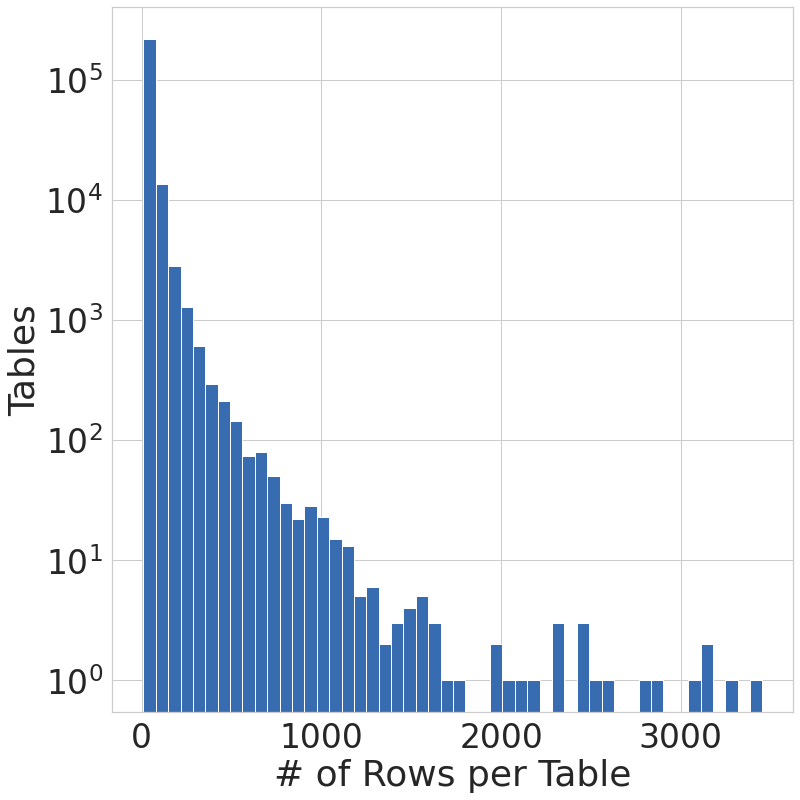

In [9]:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=3)
sns.set_style(style='whitegrid')
sns.histplot(table_corpus_distribution_df_2013['num_rows'], bins=50, color='#386cb0', alpha=1)

plt.yscale('log')
plt.xlabel("# of Rows per Table");plt.ylabel("Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/num_rows_table_corpus.svg')
plt.savefig('figures/query_distribution/num_rows_table_corpus.pdf')

## Query Distribution

In [60]:
valid_queries_dir = 'queries/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_1/'
valid_wikipage_ids = []
for filename in os.listdir(valid_queries_dir):
    wikipage_id = os.path.splitext(filename)[0].split('_')[1]
    valid_wikipage_ids.append(int(wikipage_id))

# Read the queries_df and only select queries found in the `vald_wikipage_ids` list
queries_df_2013 = pd.read_pickle('query_dataframes/expanded_wikipages/filtered_queries/minTupleWidth_all_tuplesPerQuery_all.pickle')
queries_df_2013 = queries_df_2013[queries_df_2013['wikipage_id'].isin(valid_wikipage_ids)]
queries_df_2013.head()

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,11.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33, 36]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,28.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34, 38, 39, ...",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,14.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219, 2...",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,13.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526


In [61]:
print("Average number of tuples per query:", queries_df_2013['num_tuples'].mean())

Average number of tuples per query: 25.074655765920827


In [62]:
categories_relevance_scores_dir = 'groundtruth_generation/wikipage_relevance_scores/wikipages_expanded_dataset/jaccard_categories_new/'

## Number of Rows per Query Table

Min: 10.0
Max: 918.0


/tmp/ipykernel_1730418/116238622.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


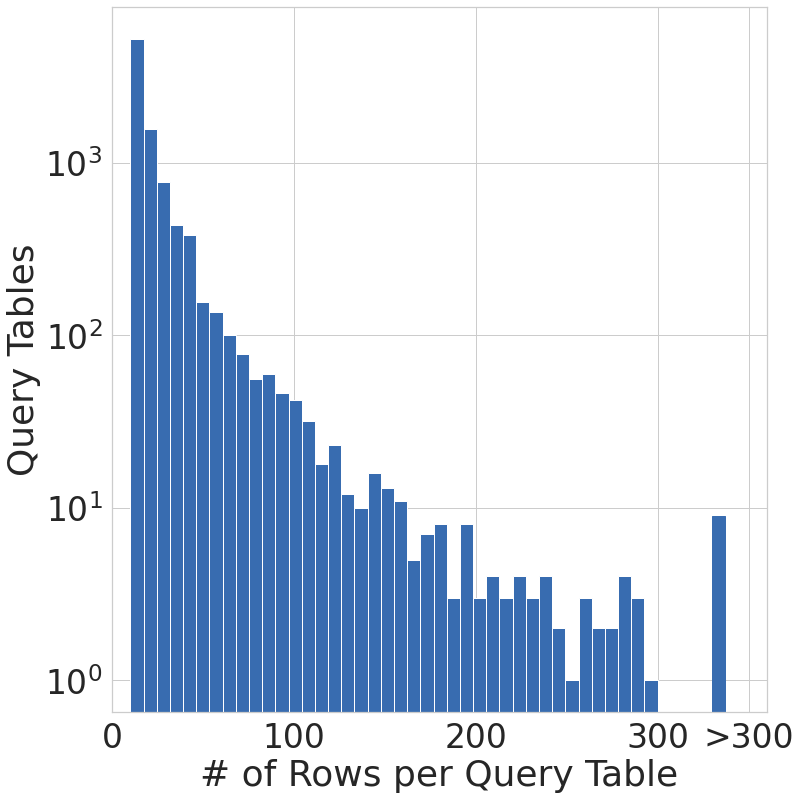

In [63]:
print('Min:', queries_df_2013['num_tuples'].min())
print('Max:', queries_df_2013['num_tuples'].max())

sns.set(rc={'figure.figsize':(12, 12)}, font_scale=3)
sns.set_style(style='whitegrid')

f, axs = plt.subplots(1, 1)
sns.histplot(queries_df_2013[queries_df_2013['num_tuples']<=300]['num_tuples'], bins=40, ax=axs, color='#386cb0', alpha=1)

# Add in the last bar
num_queries_above_threshold = len(queries_df_2013[queries_df_2013['num_tuples']>300])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((330, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels+=[">300"]
locs+=[350]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(0, 360)


plt.yscale('log')
plt.xlabel("# of Rows per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/num_rows_per_query.svg')
plt.savefig('figures/query_distribution/num_rows_per_query.pdf')

## Number of Columns per Query Table

Min: 3.0
Max: 17.0


/tmp/ipykernel_1730418/1892950283.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


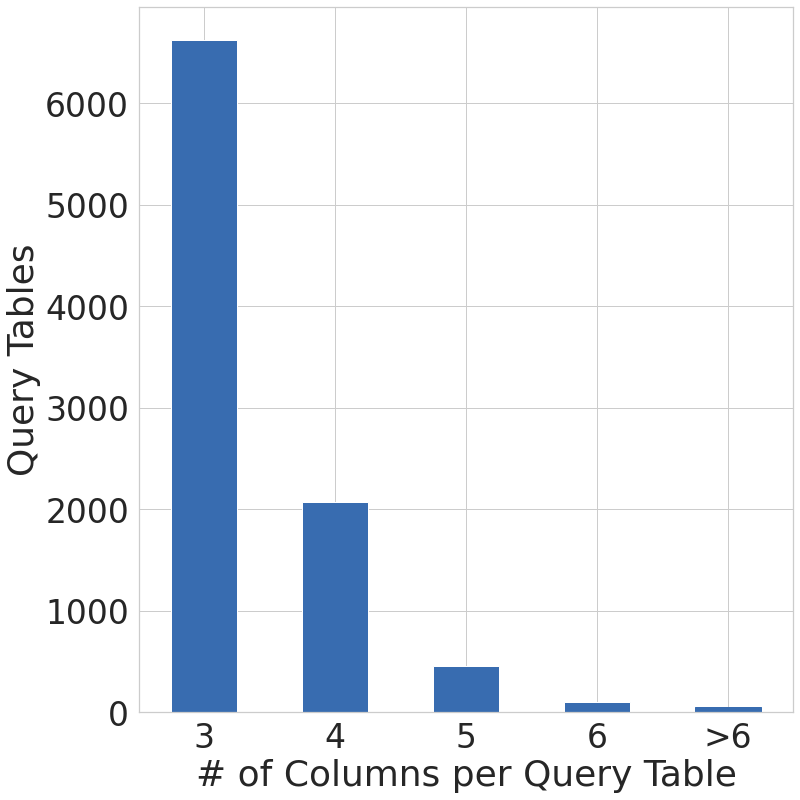

In [76]:
print('Min:', queries_df_2013['tuple_width'].min())
print('Max:', queries_df_2013['tuple_width'].max())

f, axs = plt.subplots(1, 1, figsize=(12,12))
bins = np.arange(2, 6 + 1.5) - 0.5
sns.histplot(queries_df_2013[queries_df_2013['tuple_width']<=6]['tuple_width'], bins=bins, ax=axs, color='#386cb0', alpha=1, shrink=0.5)


# Add in the last bar
num_queries_above_threshold = len(queries_df_2013[queries_df_2013['tuple_width']>6])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((6.75, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels=["3", "4", "5", "6", ">6"]
locs=[3, 4, 5, 6, 7]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(2.5, 7.5)

plt.xlabel("# of Columns per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/num_columns_per_query.svg')
plt.savefig('figures/query_distribution/num_columns_per_query.pdf')

## Number of Relevant Tables per Query Table

Min: 0.0
Max: 535.0


/tmp/ipykernel_1730418/1664171364.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


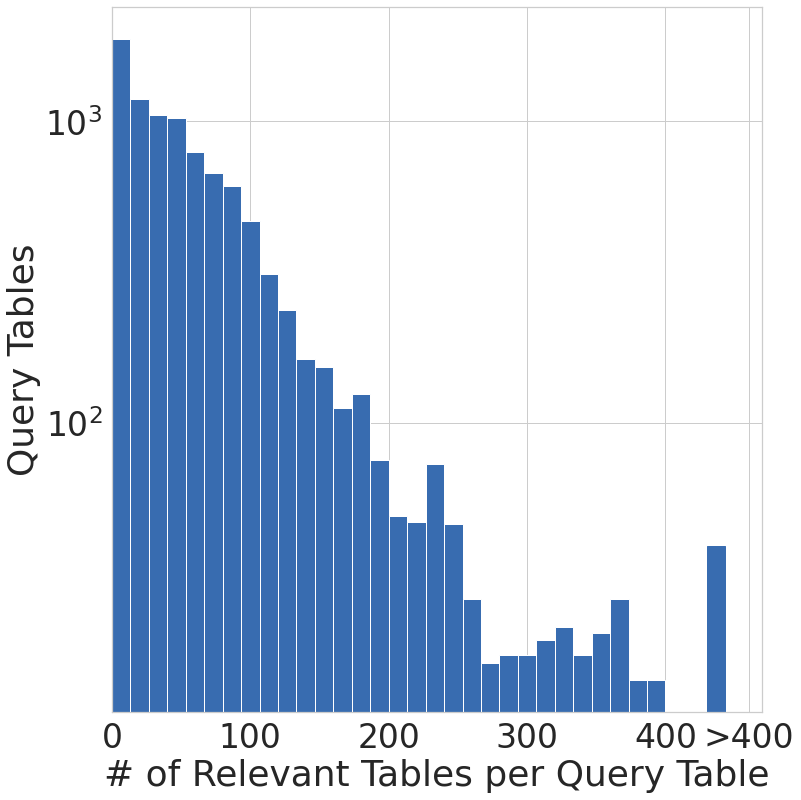

In [124]:
print('Min:', queries_df_2013['categories_relevant_tables'].min())
print('Max:', queries_df_2013['categories_relevant_tables'].max())

f, axs = plt.subplots(1, 1, figsize=(12,12))
sns.histplot(queries_df_2013[queries_df_2013['categories_relevant_tables']<=400]['categories_relevant_tables'], bins=30, ax=axs, color='#386cb0', alpha=1)

# Add in the last bar
num_queries_above_threshold = len(queries_df_2013[queries_df_2013['categories_relevant_tables']>400])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((430, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels+=[">400"]
locs+=[460]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(0, 470)

plt.yscale('log')
plt.xlabel("# of Relevant Tables per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/query_distribution/relevant_tables_per_query.svg')
plt.savefig('figures/query_distribution/relevant_tables_per_query.pdf')

No handles with labels found to put in legend.


Min: 0.0
Max: 495.0


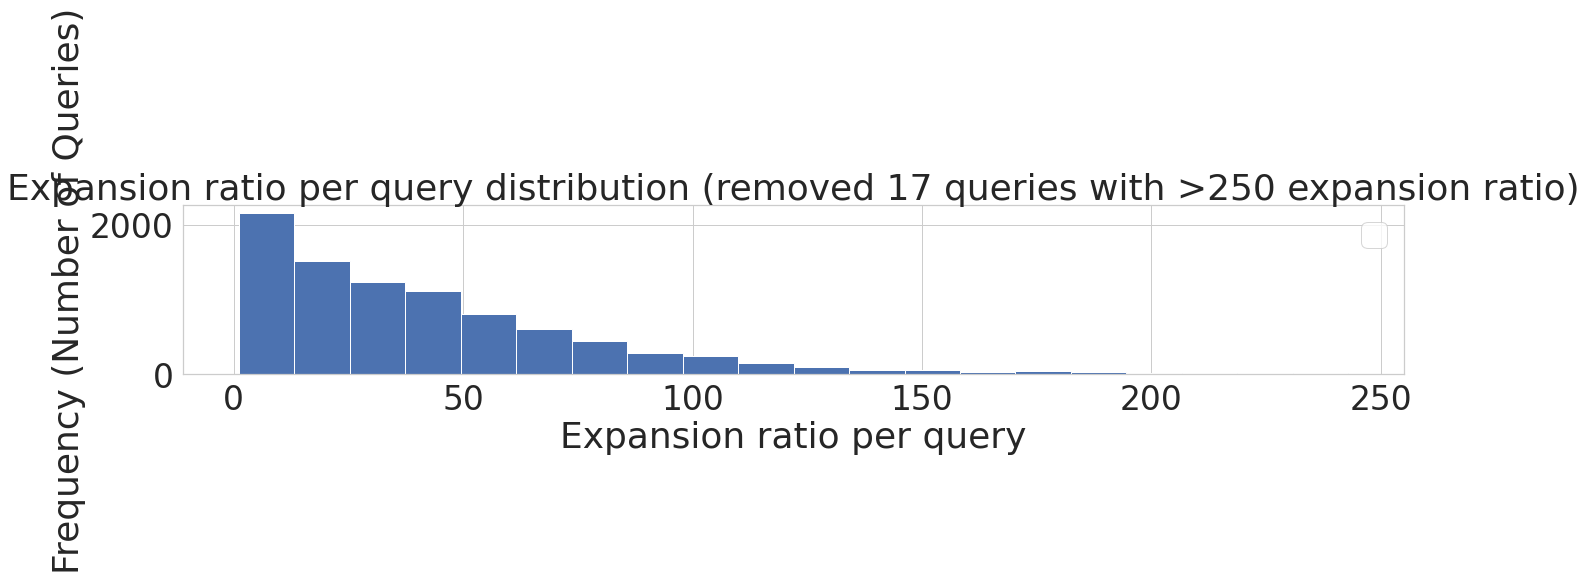

In [13]:
print('Min:', queries_df['categories_expansion_ratio'].min())
print('Max:', queries_df['categories_expansion_ratio'].max())

queries_df_filtered = queries_df[queries_df['categories_expansion_ratio']>1]
queries_df_filtered = queries_df_filtered[queries_df_filtered['categories_expansion_ratio']<250]


ax = plt.hist(queries_df_filtered['categories_expansion_ratio'], bins=20)
plt.xlabel("Expansion ratio per query");plt.ylabel("Frequency (Number of Queries)");plt.title("Expansion ratio per query distribution (removed 17 queries with >250 expansion ratio)");plt.legend();plt.tight_layout()
plt.savefig('figures/query_distribution/expansion_ratio.svg')

# Wikipages 2019 Dataset (2023-05-26)

## Table Corpus Distribution

In [10]:
df = pd.read_pickle('../../tables/wikipages/wikipages_2019_dataset_2023_3_29/wikipages_df.pickle')
df

,wikipage,wikipage_id,num_tables,tables
0,https://en.wikipedia.org/wiki/Mid_Antrim_(Nort...,10000032,1,[10000032-225778.json]
1,https://en.wikipedia.org/wiki/Julien_Leparoux,10000228,1,[10000228-225805.json]
2,https://en.wikipedia.org/wiki/Juha_Lallukka,10000324,1,[10000324-226232.json]
3,https://en.wikipedia.org/wiki/Secchi_(lunar_cr...,1000074,1,[1000074-27157.json]
4,https://en.wikipedia.org/wiki/Silberschlag_(cr...,1000079,1,[1000079-27201.json]
...,...,...,...,...
377959,https://en.wikipedia.org/wiki/Mid-Eastern_Conf...,9999731,5,"[9999731-225541.json, 9999731-225542.json, 999..."
377960,https://en.wikipedia.org/wiki/Peter_Mayhew,999975,1,[999975-27118.json]
377961,https://en.wikipedia.org/wiki/Reiner_(crater),999978,1,[999978-27597.json]
377962,https://en.wikipedia.org/wiki/Reinhold_(crater),999989,1,[999989-27594.json]


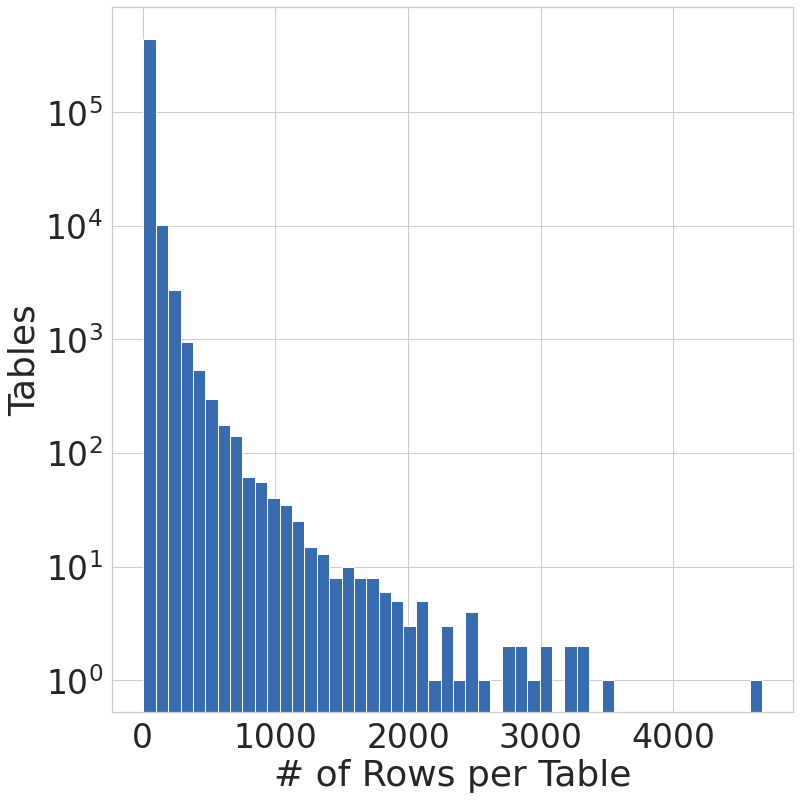

In [12]:
table_corpus_distribution_df_2019 = pd.read_pickle('../../tables/wikipages/wikipages_2019_dataset_2023_3_29/table_corpus_distribution_df.pickle')

sns.set(rc={'figure.figsize':(12, 12)}, font_scale=3)
sns.set_style(style='whitegrid')
sns.histplot(table_corpus_distribution_df_2019['num_rows'], bins=50, color='#386cb0', alpha=1)

plt.yscale('log')
plt.xlabel("# of Rows per Table");plt.ylabel("Tables");plt.tight_layout()
plt.savefig('figures/wikipages_2019/query_distribution/num_rows_table_corpus.svg')
plt.savefig('figures/wikipages_2019/query_distribution/num_rows_table_corpus.pdf')

## Number fo Rows per Query Table

In [66]:
table_corpus_distribution_df = pd.read_pickle('../../tables/wikipages/wikipages_2019_dataset_2023_3_29/table_corpus_distribution_df.pickle')
queries_df_2019 = pd.read_pickle('query_dataframes/wikipages_2019/full_corpus/minTupleWidth_2_tuplesPerQuery_10_filtered.pickle')

rows_per_query_table_list_2019=[]
for idx, query_row in queries_df_2019.iterrows():
    selected_table = query_row['selected_table']
    num_rows = table_corpus_distribution_df[table_corpus_distribution_df['filename']==selected_table]['num_rows'].values[0]
    rows_per_query_table_list_2019.append(num_rows)

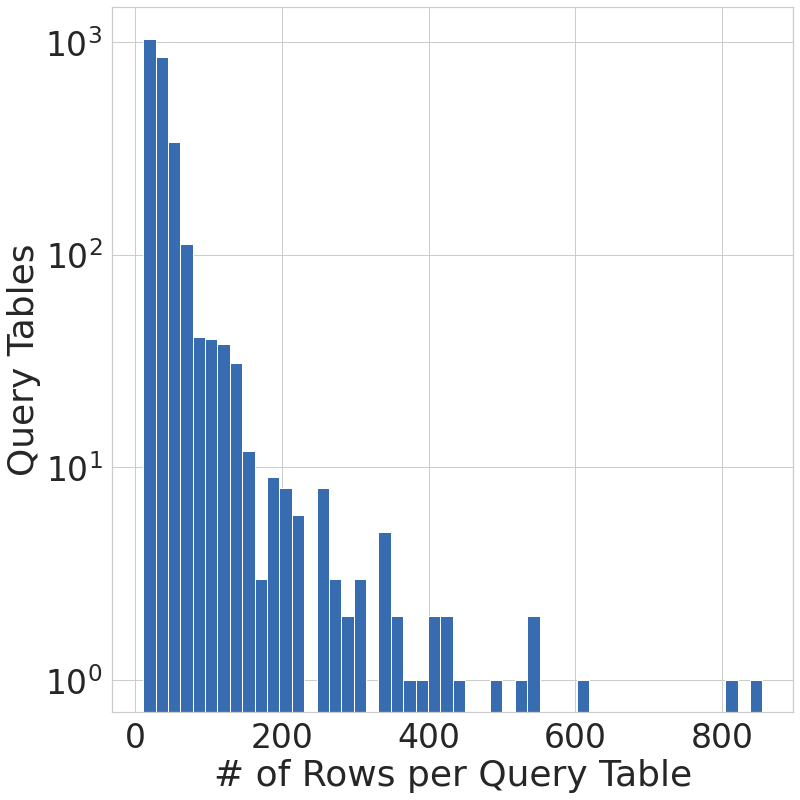

In [67]:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=3)
sns.set_style(style='whitegrid')

f, axs = plt.subplots(1, 1)
sns.histplot(rows_per_query_table_list_2019, bins=50, ax=axs, color='#386cb0', alpha=1)

plt.yscale('log')
plt.xlabel("# of Rows per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/wikipages_2019/query_distribution/num_rows_per_query.svg')
plt.savefig('figures/wikipages_2019/query_distribution/num_rows_per_query.pdf')

## Number of Columns per Query Table

Min: 2.0
Max: 11.0


/tmp/ipykernel_1730418/4225844363.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


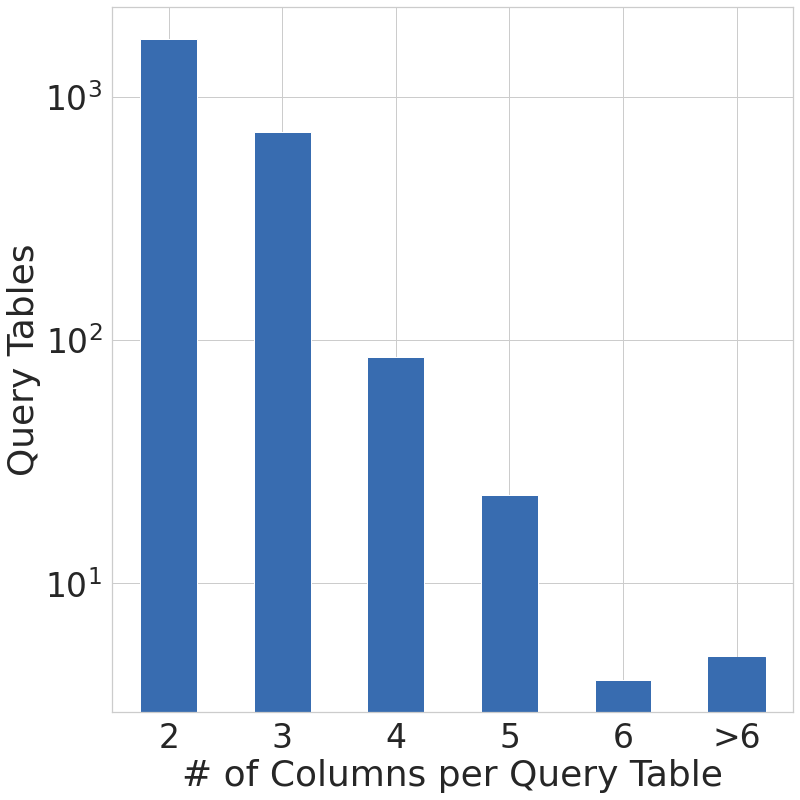

In [96]:
print('Min:', queries_df_2019['tuple_width'].min())
print('Max:', queries_df_2019['tuple_width'].max())

f, axs = plt.subplots(1, 1, figsize=(12, 12))
bins = np.arange(1, 6 + 1.5) - 0.5
sns.histplot(queries_df_2019['tuple_width'], bins=bins, ax=axs, color='#386cb0', alpha=1, shrink=0.5)


# Add in the last bar
num_queries_above_threshold = len(queries_df_2019[queries_df_2019['tuple_width']>6])
width=0
for p in axs.patches:
    width=p.get_width()
axs.add_patch(patches.Rectangle((6.75, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels
plt.draw()
labels = [w.get_text() for w in axs.get_xticklabels()]
locs=list(axs.get_xticks())
labels=["2", "3", "4", "5", "6", ">6"]
locs=[2, 3, 4, 5, 6, 7]
axs.set_xticklabels(labels)
axs.set_xticks(locs)
plt.xlim(1.5, 7.5)
plt.yscale('log')
plt.xlabel("# of Columns per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/wikipages_2019/query_distribution/num_columns_per_query.svg')
plt.savefig('figures/wikipages_2019/query_distribution/num_columns_per_query.pdf')

## Number of Relevant Tables per Query Table

In [125]:
categories_relevance_scores_dir = 'groundtruth_generation/wikipage_relevance_scores/wikipages_2019_dataset_2023_3_29_output/jaccard_categories/'

# Get the number of relevant wikitables for each query
num_categories_relevant_tables_list = []
for query_wikipage_id in tqdm(queries_df_2019['wikipage_id']):
    relevant_wikipages = get_relevant_wikipages(query_wikipage_id, categories_relevance_scores_dir)
    num_categories_relevant_tables = get_relevant_wikitables(relevant_wikipages, df)
    num_categories_relevant_tables_list.append(num_categories_relevant_tables)
queries_df_2019['num_categories_relevant_tables'] = num_categories_relevant_tables_list
queries_df_2019.to_pickle('query_dataframes/wikipages_2019/full_corpus/minTupleWidth_2_tuplesPerQuery_10_filtered_with_relevance_stats.pickle')
queries_df_2019

  0%|          | 0/2560 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'groundtruth_generation/wikipage_relevance_scores/wikipages_2019_dataset_2023_3_29_output/jaccard_categories/10016593.json'

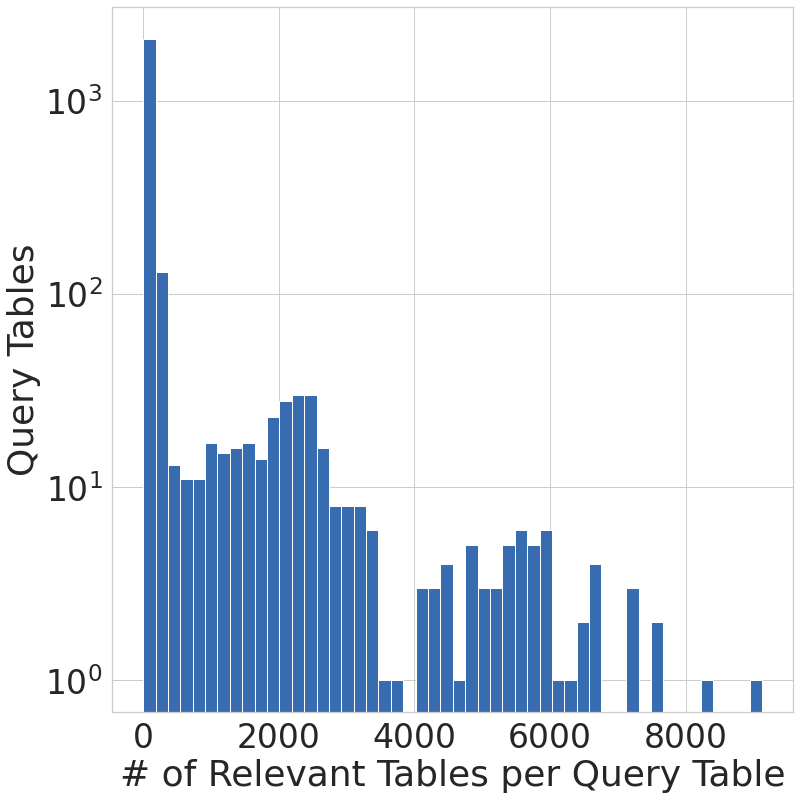

In [126]:
queries_df_2019 = pd.read_pickle('query_dataframes/wikipages_2019/full_corpus/minTupleWidth_2_tuplesPerQuery_10_filtered_with_relevance_stats.pickle')

f, axs = plt.subplots(1, 1, figsize=(12,12))
sns.histplot(queries_df_2019['num_categories_relevant_tables'], bins=50, ax=axs, color='#386cb0', alpha=1)

plt.yscale('log')
plt.xlabel("# of Relevant Tables per Query Table");plt.ylabel("Query Tables");plt.tight_layout()
plt.savefig('figures/wikipages_2019/query_distribution/relevant_tables_per_query.svg')
plt.savefig('figures/wikipages_2019/query_distribution/relevant_tables_per_query.pdf')

# New Figures for CIKM (2023/6/9)

In [38]:
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

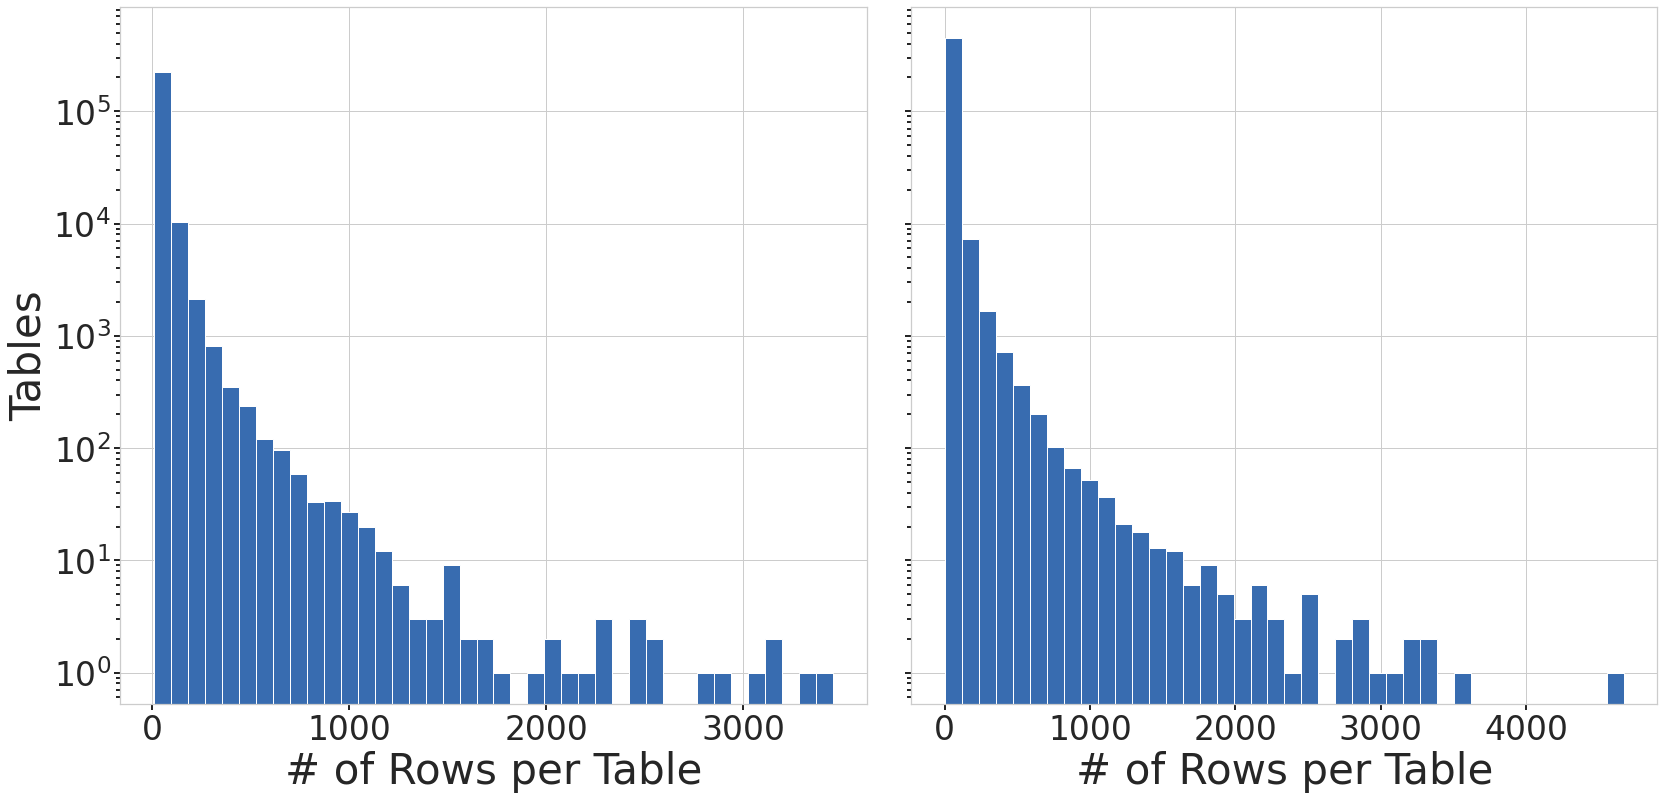

In [134]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(24,12))

sns.set_style(style='whitegrid')

sns.histplot(table_corpus_distribution_df_2013['num_rows'], bins=40, color='#386cb0', alpha=1, ax=ax[0])
sns.histplot(table_corpus_distribution_df_2019['num_rows'], bins=40, color='#386cb0', alpha=1, ax=ax[1])
ax[0].set_ylabel('Tables', fontsize=42)
ax[0].set_xlabel('# of Rows per Table', fontsize=42);ax[1].set_xlabel('# of Rows per Table', fontsize=42)

for ax_id in range(len(ax)):
    ax[ax_id].tick_params(which='both', labelbottom=True, labelleft=True, bottom=True, left=True, width=2)
ax[1].tick_params(labelleft=False)

plt.yscale('log');plt.tight_layout()
plt.savefig('figures/query_distribution/new_figures/num_rows_table_corpus.svg')
plt.savefig('figures/query_distribution/new_figures/num_rows_table_corpus.pdf')

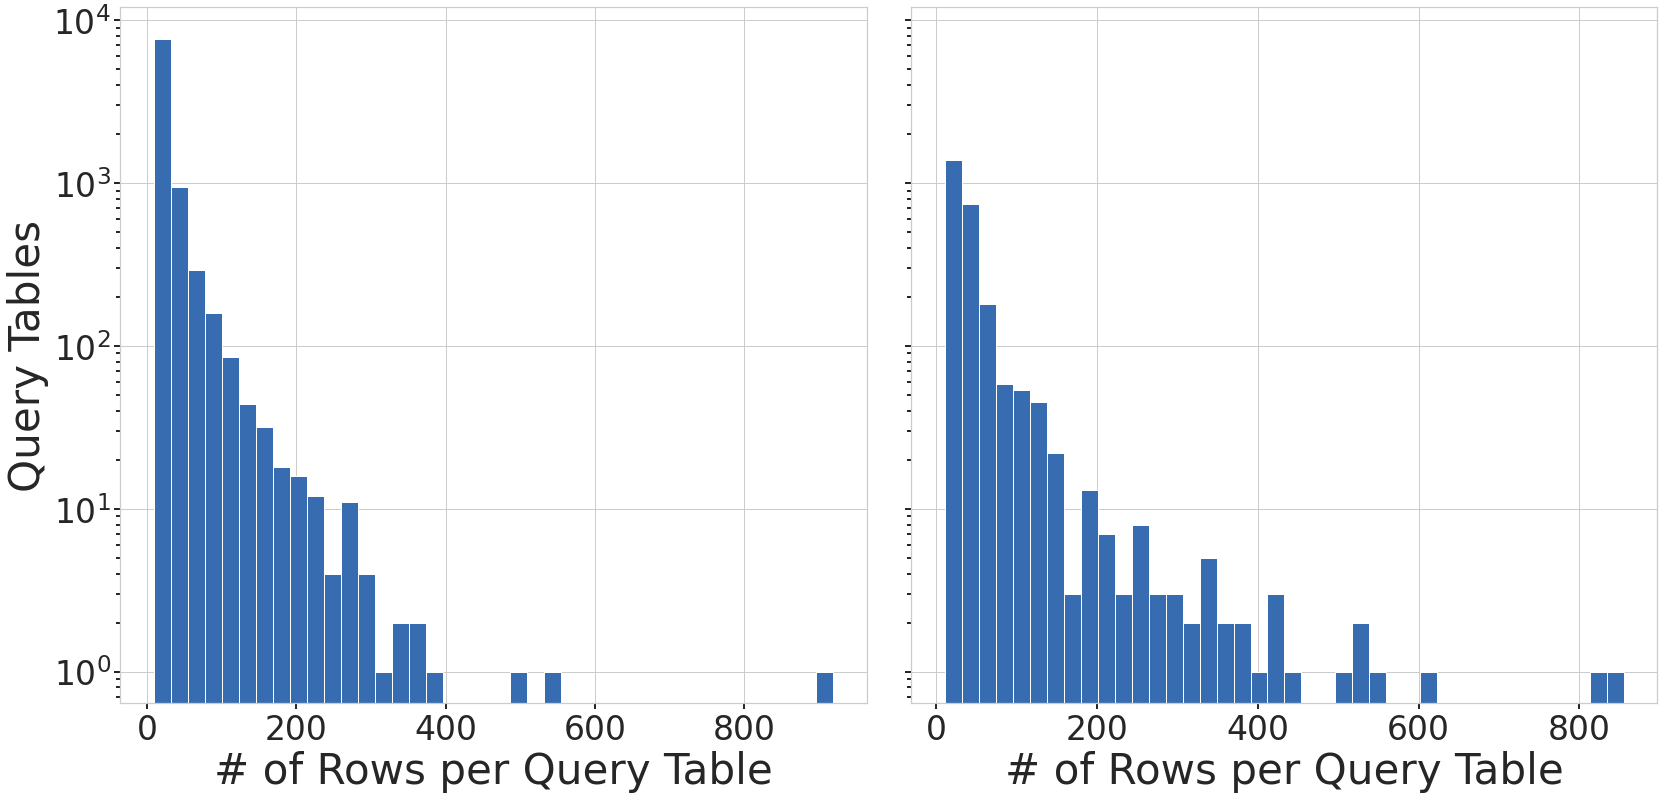

In [135]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(24,12))
sns.set_style(style='whitegrid')

sns.histplot(queries_df_2013['num_tuples'], bins=40, ax=ax[0], color='#386cb0', alpha=1)
sns.histplot(rows_per_query_table_list_2019, bins=40, ax=ax[1], color='#386cb0', alpha=1)

ax[0].set_ylabel('Query Tables', fontsize=42)
ax[0].set_xlabel('# of Rows per Query Table', fontsize=42);ax[1].set_xlabel('# of Rows per Query Table', fontsize=42)

for ax_id in range(len(ax)):
    ax[ax_id].tick_params(which='both', labelbottom=True, labelleft=True, bottom=True, left=True, width=2)
ax[1].tick_params(labelleft=False)

plt.yscale('log');plt.tight_layout()
plt.savefig('figures/query_distribution/new_figures/num_rows_per_query.svg')
plt.savefig('figures/query_distribution/new_figures/num_rows_per_query.pdf')

/tmp/ipykernel_1730418/4286011962.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels)
/tmp/ipykernel_1730418/4286011962.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels)


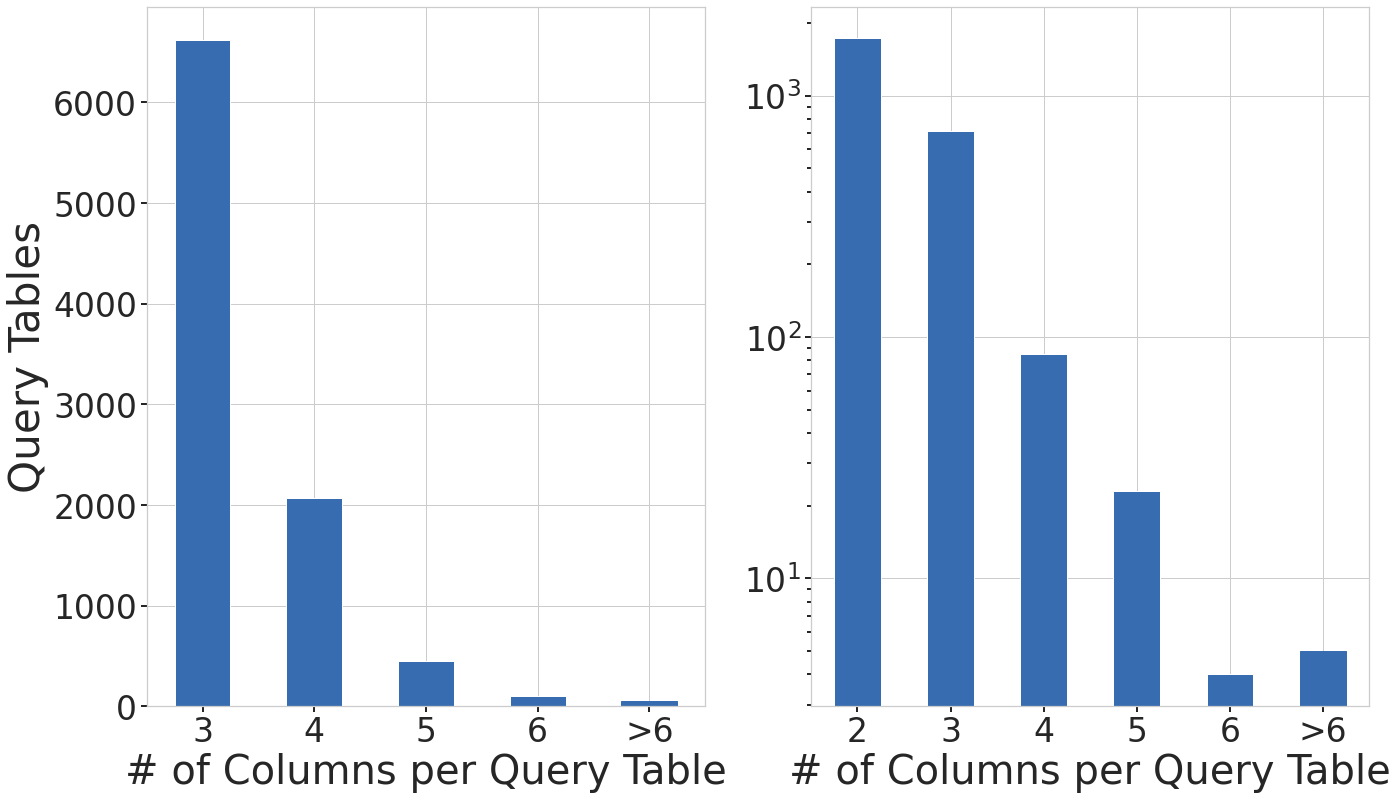

In [137]:
fig, ax = plt.subplots(1, 2, sharey=False, figsize=(20,12))

bins_2013 = np.arange(2, 6 + 1.5) - 0.5
bins_2019 = np.arange(1, 6 + 1.5) - 0.5

sns.histplot(queries_df_2013[queries_df_2013['tuple_width']<=6]['tuple_width'], bins=bins_2013, ax=ax[0], color='#386cb0', alpha=1, shrink=0.5)
sns.histplot(queries_df_2019['tuple_width'], bins=bins_2019, ax=ax[1], color='#386cb0', alpha=1, shrink=0.5)

ax[0].set_ylabel('Query Tables', fontsize=42);ax[1].set_ylabel('', fontsize=42);
ax[0].set_xlabel('# of Columns per Query Table', fontsize=40);ax[1].set_xlabel('# of Columns per Query Table', fontsize=40)

# Add in the last bar 2013
num_queries_above_threshold = len(queries_df_2013[queries_df_2013['tuple_width']>6])
width=0
for p in ax[0].patches:
    width=p.get_width()
ax[0].add_patch(patches.Rectangle((6.75, 0), width, num_queries_above_threshold, color='#386cb0'))

# Add in the last bar 2019
num_queries_above_threshold = len(queries_df_2019[queries_df_2019['tuple_width']>6])
width=0
for p in ax[1].patches:
    width=p.get_width()
ax[1].add_patch(patches.Rectangle((6.75, 0), width, num_queries_above_threshold, color='#386cb0'))

# Modify the labels 2013
labels = [w.get_text() for w in ax[0].get_xticklabels()]
locs=list(ax[0].get_xticks())
labels=["3", "4", "5", "6", ">6"]
locs=[3, 4, 5, 6, 7]
ax[0].set_xticklabels(labels)
ax[0].set_xticks(locs)
ax[0].set_xlim(2.5, 7.5)

# Modify the labels 2019
labels = [w.get_text() for w in ax[1].get_xticklabels()]
locs=list(ax[1].get_xticks())
labels=["2", "3", "4", "5", "6", ">6"]
locs=[2, 3, 4, 5, 6, 7]
ax[1].set_xticklabels(labels)
ax[1].set_xticks(locs)
ax[1].set_xlim(1.5, 7.5)

ax[0].set_yscale('linear')
ax[1].set_yscale('log')

for ax_id in range(len(ax)):
    ax[ax_id].tick_params(which='both', labelbottom=True, labelleft=True, bottom=True, left=True, width=2)

plt.tight_layout()
plt.savefig('figures/query_distribution/new_figures/num_columns_per_query.svg')
plt.savefig('figures/query_distribution/new_figures/num_columns_per_query.pdf')

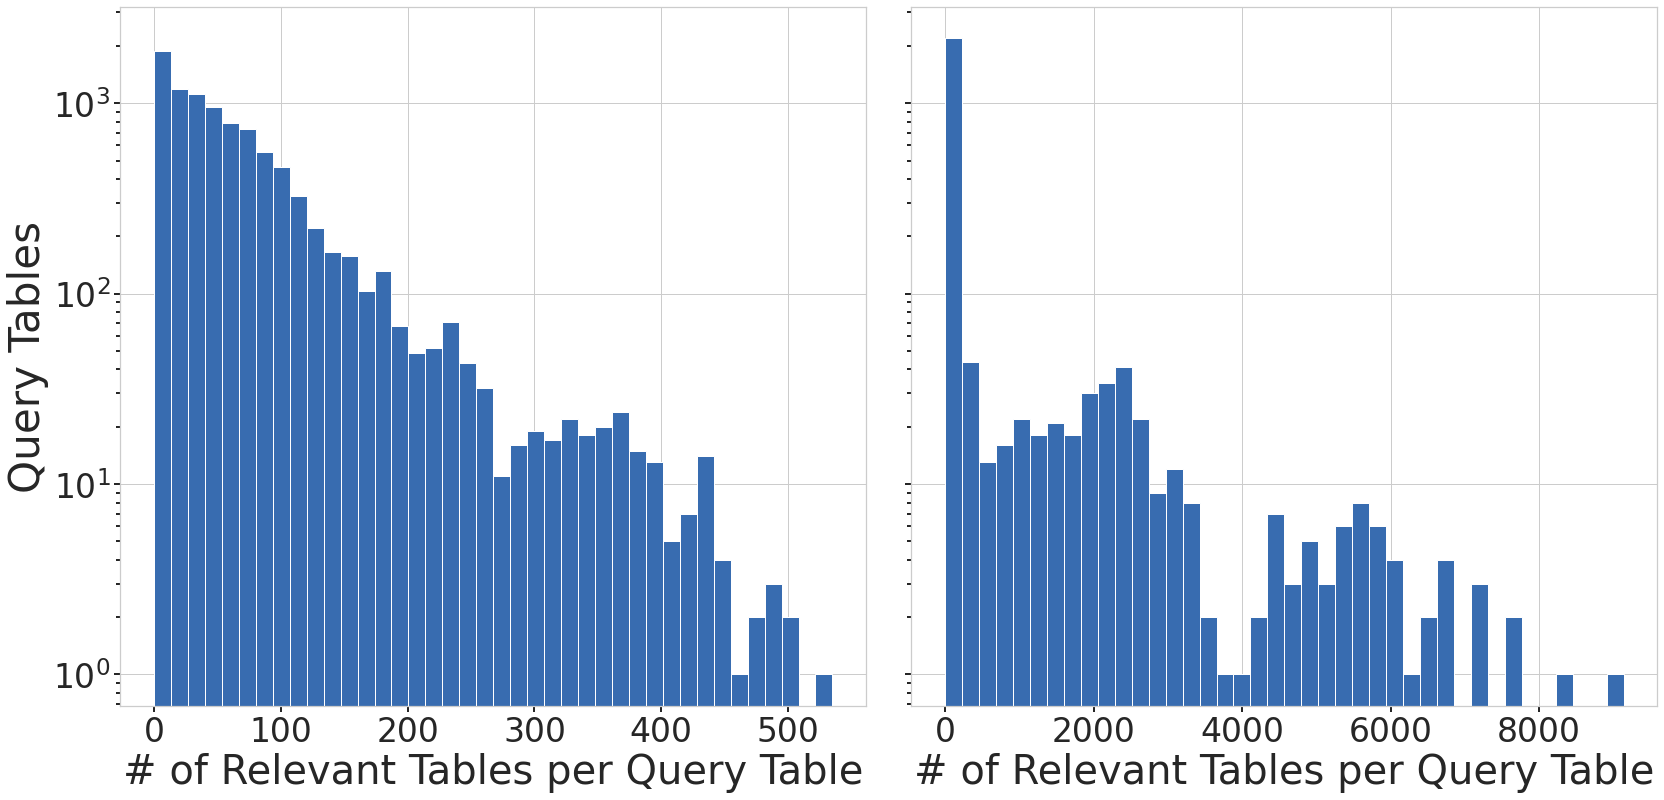

In [136]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(24,12))
sns.histplot(queries_df_2013['categories_relevant_tables'], bins=40, ax=ax[0], color='#386cb0', alpha=1)
sns.histplot(queries_df_2019['num_categories_relevant_tables'], bins=40, ax=ax[1], color='#386cb0', alpha=1)

for ax_id in range(len(ax)):
    ax[ax_id].tick_params(which='both', labelbottom=True, labelleft=True, bottom=True, left=True, width=2)
ax[1].tick_params(labelleft=False)

ax[0].set_ylabel('Query Tables', fontsize=42);
ax[0].set_xlabel('# of Relevant Tables per Query Table', fontsize=40);ax[1].set_xlabel('# of Relevant Tables per Query Table', fontsize=40)

plt.yscale('log');plt.tight_layout()
plt.savefig('figures/query_distribution/new_figures/relevant_tables_per_query.svg')
plt.savefig('figures/query_distribution/new_figures/relevant_tables_per_query.pdf')

# Populate the expanded_dataset_query_tables directory (copy the query tables)

In [13]:
import shutil

tables_dir = '../../tables/wikipages/wikipages_expanded_dataset/tables/'
query_output_dir = '../../tables/wikipages/expanded_dataset_query_tables/'

for idx, row in tqdm(queries_df.iterrows(), total=queries_df.shape[0]):
    query_table = row['selected_table']
    shutil.copy(tables_dir+query_table, query_output_dir+query_table)

100%|██████████| 9771/9771 [01:09<00:00, 140.45it/s]


# All queries (Variable tuples per query)

In [6]:
queries_df

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,11.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33, 36]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,28.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34, 38, 39, ...",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,14.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219, 2...",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,13.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,10.0,table-1653-355.json,"[4, 6, 7, 8, 10, 16, 17, 24, 26, 30]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,11.0,table-1653-409.json,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 15]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,13.0,table-1653-615.json,"[0, 1, 2, 3, 4, 11, 15, 19, 21, 22, 23, 24, 27]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,15.0,table-1653-730.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [8]:
queries_df_1_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_1.pickle')
queries_df_1_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,1.0,table-0001-242.json,[4],51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,1.0,table-0001-319.json,[0],7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,1.0,table-0001-460.json,[0],27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,1.0,table-0001-469.json,[2],16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,1.0,table-0001-65.json,[0],34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,1.0,table-1653-355.json,[4],68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,1.0,table-1653-409.json,[0],40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,1.0,table-1653-615.json,[0],88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,1.0,table-1653-730.json,[0],44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [9]:
queries_df_2_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_2.pickle')
queries_df_2_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,2.0,table-0001-242.json,"[4, 6]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,2.0,table-0001-319.json,"[0, 3]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,2.0,table-0001-460.json,"[0, 8]",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,2.0,table-0001-469.json,"[2, 44]",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,2.0,table-0001-65.json,"[0, 1]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,2.0,table-1653-355.json,"[4, 6]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,2.0,table-1653-409.json,"[0, 1]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,2.0,table-1653-615.json,"[0, 1]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,2.0,table-1653-730.json,"[0, 1]",44.0,240.0,NaN,NaN,15.0,NaN,0.131381


In [10]:
queries_df_10_tuple = pd.read_pickle('query_dataframes/expanded_wikipages/all_queries/minTupleWidth_2_tuplesPerQuery_10.pickle')
queries_df_10_tuple

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,selected_table,selected_row_ids,categories_relevant_wikipages,categories_relevant_tables,navigation_links_relevant_wikipages,navigation_links_relevant_tables,categories_expansion_ratio,navigation_links_expansion_ratio,avg_query_containment
32,https://en.wikipedia.org/wiki/Andre_Norton_Award,32,1,[table-0001-242.json],[80],4.0,10.0,table-0001-242.json,"[4, 6, 7, 10, 13, 14, 28, 30, 31, 33]",51.0,58.0,NaN,NaN,58.0,NaN,0.036120
46,https://en.wikipedia.org/wiki/President_of_Ind...,46,1,[table-0001-319.json],[20],3.0,10.0,table-0001-319.json,"[0, 3, 4, 5, 6, 7, 8, 12, 14, 18]",7.0,7.0,NaN,NaN,7.0,NaN,0.271930
66,https://en.wikipedia.org/wiki/Charlotte_Bobcat...,66,1,[table-0001-460.json],[108],3.0,10.0,table-0001-460.json,"[0, 8, 9, 15, 19, 21, 26, 28, 31, 34]",27.0,122.0,NaN,NaN,122.0,NaN,0.026968
68,https://en.wikipedia.org/wiki/List_of_organism...,68,1,[table-0001-469.json],[355],3.0,10.0,table-0001-469.json,"[2, 44, 45, 53, 80, 107, 206, 208, 213, 219]",16.0,37.0,NaN,NaN,37.0,NaN,0.002137
97,https://en.wikipedia.org/wiki/1982_NCAA_Women'...,97,2,"[table-0001-64.json, table-0001-65.json]","[12, 58]",4.0,10.0,table-0001-65.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]",34.0,39.0,NaN,NaN,19.5,NaN,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244164,https://en.wikipedia.org/wiki/2004_LPGA_Tour,244164,2,"[table-1653-355.json, table-1653-356.json]","[64, 15]",3.0,10.0,table-1653-355.json,"[4, 6, 7, 8, 10, 16, 17, 24, 26, 30]",68.0,81.0,NaN,NaN,40.5,NaN,0.237500
244174,https://en.wikipedia.org/wiki/1998_NCAA_Women'...,244174,1,[table-1653-409.json],[56],4.0,10.0,table-1653-409.json,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]",40.0,48.0,NaN,NaN,48.0,NaN,0.206687
244209,https://en.wikipedia.org/wiki/1931_Italian_Gra...,244209,1,[table-1653-615.json],[26],3.0,10.0,table-1653-615.json,"[0, 1, 2, 3, 4, 11, 15, 19, 21, 22]",88.0,129.0,NaN,NaN,129.0,NaN,0.075247
244229,https://en.wikipedia.org/wiki/List_of_World_Aq...,244229,16,"[table-1653-718.json, table-1653-720.json, tab...","[30, 44, 45, 40, 40, 44, 41, 24, 21, 47, 25, 4...",4.0,10.0,table-1653-730.json,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",44.0,240.0,NaN,NaN,15.0,NaN,0.131381
